In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
dataset=pd.read_csv('../CSV Files/cleanedgoogleplaystore.csv')

In [3]:
dataset.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      199  14.0    500000  Free    0.0       Everyone   
2      214   8.7   5000000  Free    0.0       Everyone   
3       92  25.0  50000000  Free    0.0           Teen   
4      199   2.8    100000  Free    0.0       Everyone   

                      Genres      Last Updated  Current Ver  Android Ver  \
0               Art & Design   January 7, 2018          1.0          4.0   
1  Art & Design;Pretend Play  January 15, 2018          2.0          4.0   
2               Art & Design    August 1, 2018          1.0          4.0   
3               Art & Design      June 8, 2018          1.0          4.0   
4    Art & Design;Creativity     June 20, 2018          1.0          4.0   

   Last Updated Yr  
0             2018  
1             2018  
2             2018  
3             2018  
4             2018

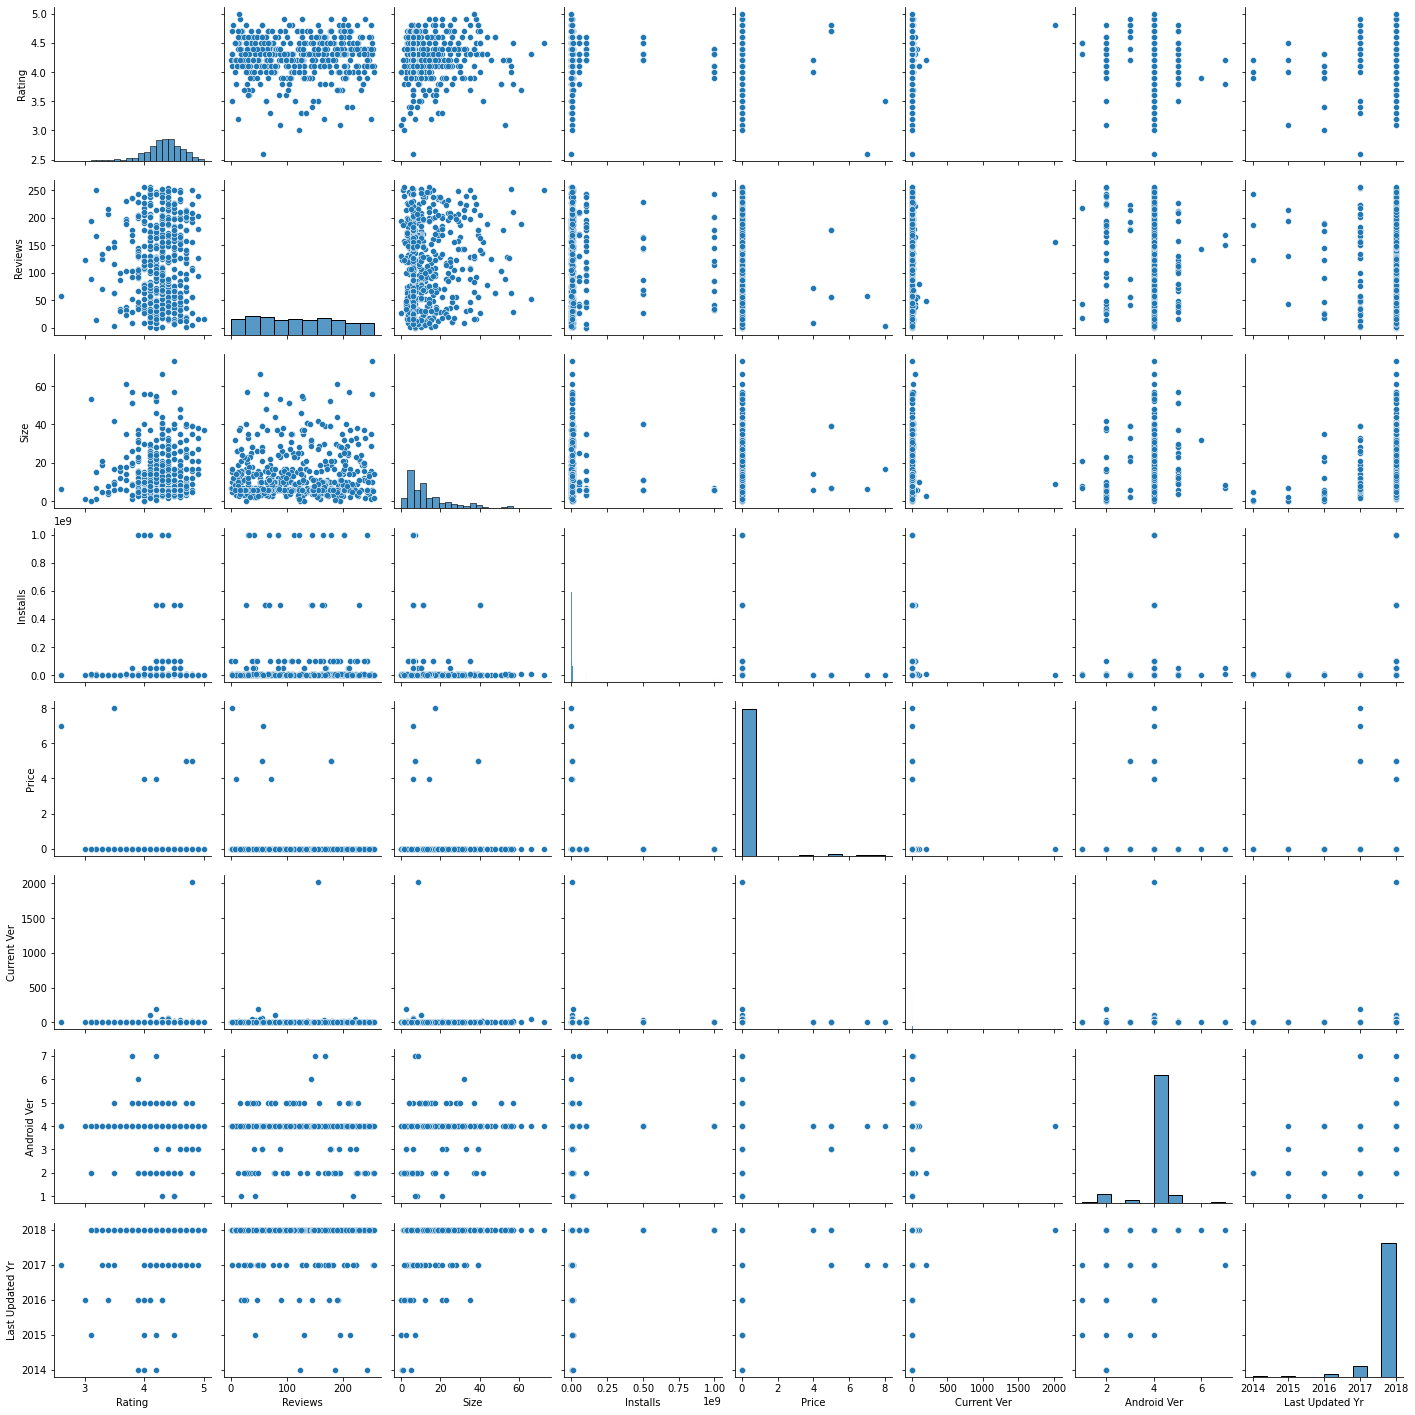

In [4]:
sns.pairplot(dataset[:500])

* No significant linear correlation found

## Category

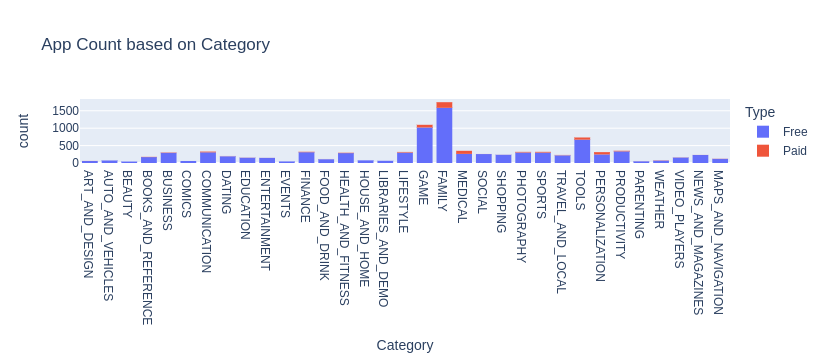

In [5]:
px.histogram(dataset,x='Category',color='Type',title='App Count based on Category')

In [6]:
sum(dataset['Category'].value_counts()<351)*100/len(dataset['Category'].unique())

87.87878787878788

* Most published App Category is "Family"(1746) followed by "Game"(1097) & "Tools"(733)
* Least published App Category is "Beauty"(42) followed by "Events"(45) & "Parenting"(50)
* Majority of all categories app count(87.87%) fall under the range [0-351] 
* Paid are much less compared to Free Apps
* Most paid apps are of type 'Family','Medical' & "Game"

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

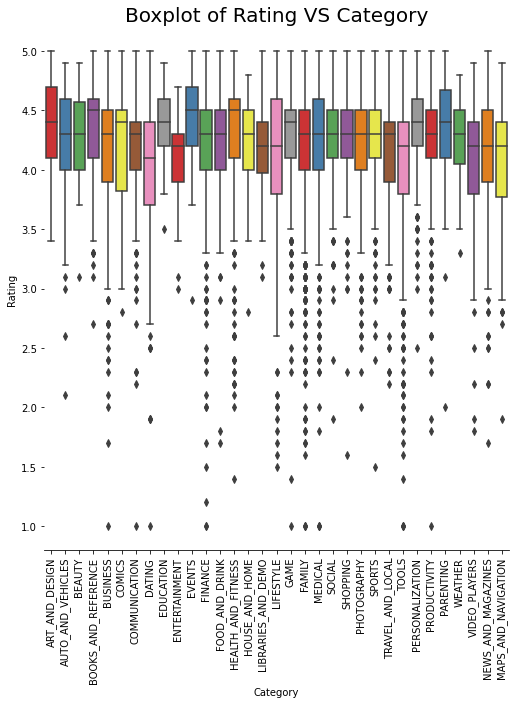

In [7]:
g = sns.catplot(x="Category",y="Rating",data=dataset, kind="box", height = 8 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

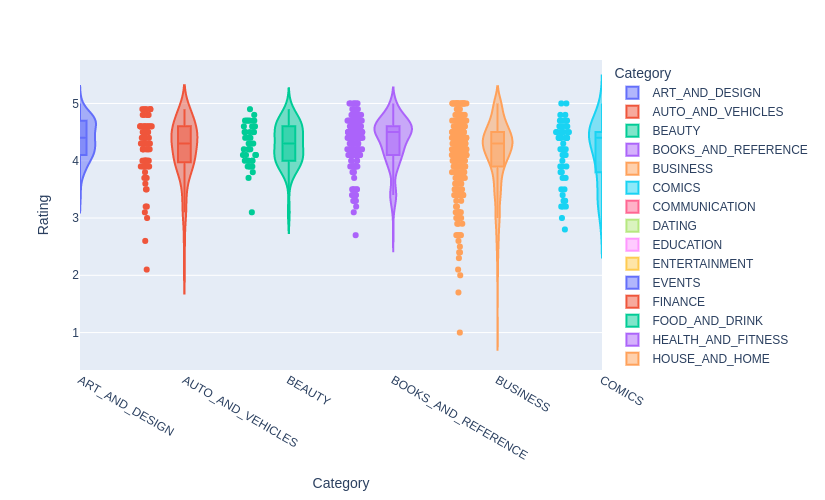

In [8]:
px.violin(data_frame=dataset,x='Category',y='Rating',color='Category',range_x=[0,5],height=500,box=True,points='all')

* Overall all of the categories have median Rating as around 4.3

Text(0.5, 1.0, 'Boxplot of Size Category')

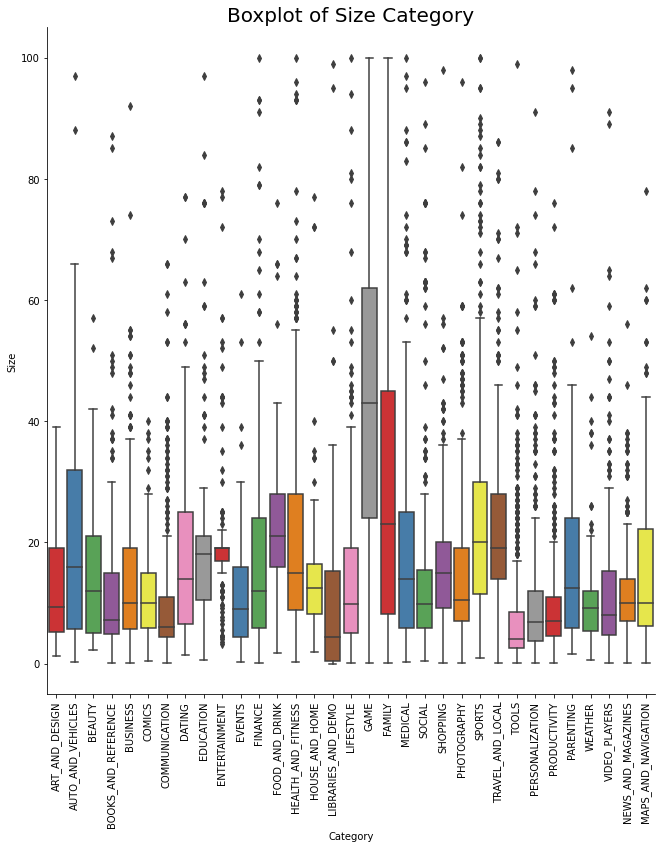

In [9]:
g = sns.catplot(x="Category",y="Size",data=dataset, kind="box", height =10,
palette = "Set1")
# g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Size")
plt.title('Boxplot of Size Category',size = 20)

* Games & Family tend to have large range of size than other categories. 
* There are outliers in almost all categories 


We can check whether bulky apps fare better wrt ratings

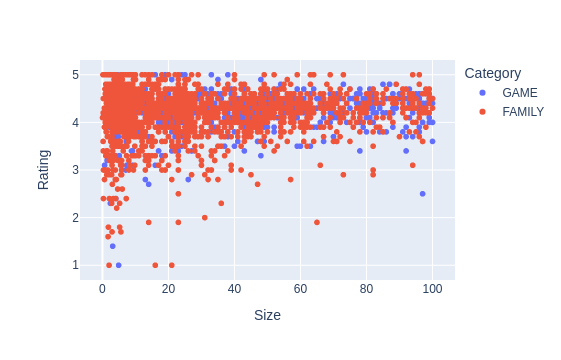

In [31]:
px.scatter(data_frame=dataset[(dataset['Category']=='GAME')| (dataset['Category']=='FAMILY')],x='Size',y='Rating',color='Category')

* Even bulky Family Apps & Games have higher rating compared to smaller ones. So we can safely assume that the large size is for a reason (maybe better graphics in case of games)

<AxesSubplot:xlabel='Category'>

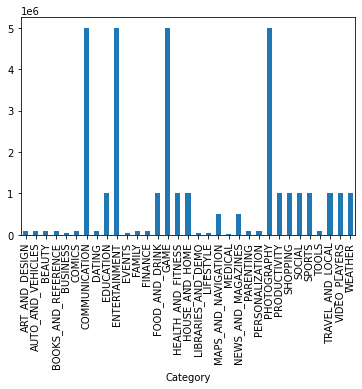

In [10]:
dataset.groupby('Category')['Installs'].median().plot.bar()

* People tend to download more Communication, Entertainment, Photography apps & Games.

In [11]:
paidAppsDf=dataset[dataset['Type']=='Paid']

In [12]:
paidAppsDf

App            Category  \
222   TurboScan: scan documents and receipts in PDF            BUSINESS   
223                  Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
278   TurboScan: scan documents and receipts in PDF            BUSINESS   
279                  Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
414                              Puffin Browser Pro       COMMUNICATION   
...                                             ...                 ...   
9258                                       FO Bixby     PERSONALIZATION   
9260                                        Mu.F.O.                GAME   
9305                                Fast Tract Diet  HEALTH_AND_FITNESS   
9319                        Trine 2: Complete Story                GAME   
9322                                   sugar, sugar              FAMILY   

      Rating  Reviews      Size  Installs  Type  Price Content Rating  \
222      4.7      178   6.80000    100000  Paid   4.99       Everyone   
223      4.8       55  39.00000    100000  Paid   4.99       Everyone   
278      4.7      178   6.80000    100000  Paid   4.99       Everyone   
279      4.8       55  39.00000    100000  Paid   4.99       Everyone   
414      4.0       71   6.10000    100000  Paid   3.99       Everyone   
...      ...      ...       ...       ...   ...    ...            ...   
9258     5.0        5   0.84082       100  Paid   0.99       Everyone   
9260     5.0        2  16.00000         1  Paid   0.99       Everyone   
9305     4.4       35   2.40000      1000  Paid   7.99       Everyone   
9319     3.8      252  11.00000     10000  Paid  16.99           Teen   
9322     4.2      125   9.50000     10000  Paid   1.20       Everyone   

                Genres       Last Updated  Current Ver  Android Ver  \
222           Business     March 25, 2018          1.0          4.0   
223           Business     April 11, 2017          3.0          3.0   
278           Business     March 25, 2018          1.0          4.0   
279           Business     April 11, 2017          3.0          3.0   
414      Communication       July 5, 2018          7.0          4.0   
...                ...                ...          ...          ...   
9258   Personalization     April 25, 2018          0.0          7.0   
9260            Arcade      March 3, 2017          1.0          2.0   
9305  Health & Fitness     August 8, 2018          1.0          4.0   
9319            Action  February 27, 2015          2.0          5.0   
9322            Puzzle       June 5, 2018          2.0          2.0   

      Last Updated Yr  
222              2018  
223              2017  
278              2018  
279              2017  
414              2018  
...               ...  
9258             2018  
9260             2017  
9305             2018  
9319             2015  
9322             2018  

[645 rows x 14 columns]

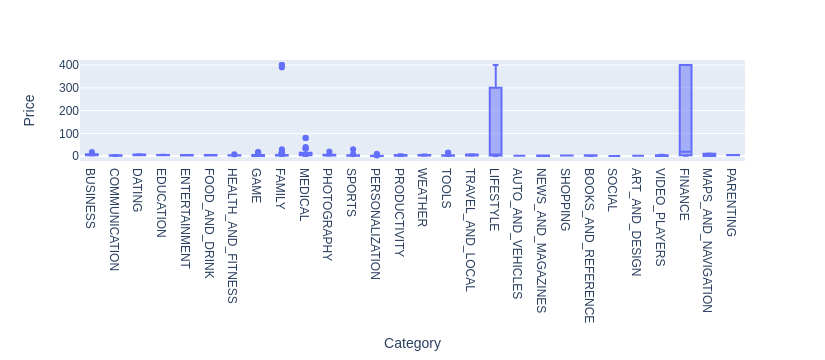

In [13]:
px.box(data_frame=paidAppsDf,x='Category',y='Price')

* There are some crazily expensive apps

In [14]:
paidAppsDf[paidAppsDf['Price']>90]

App   Category  Rating  Reviews       Size  \
4036          most expensive app (H)     FAMILY     4.3        6   1.500000   
4189                      💎 I'm rich  LIFESTYLE     3.8      206  26.000000   
4194        I'm Rich - Trump Edition  LIFESTYLE     3.6       19   7.300000   
5042                       I am rich  LIFESTYLE     3.8      219   1.800000   
5045                  I am Rich Plus     FAMILY     4.0       88   8.700000   
5046                   I am rich VIP  LIFESTYLE     3.8      155   2.600000   
5047               I Am Rich Premium    FINANCE     4.1       75   4.700000   
5048             I am extremely Rich  LIFESTYLE     2.9       41   2.900000   
5049                      I am Rich!    FINANCE     3.8       93  22.000000   
5050              I am rich(premium)    FINANCE     3.5      216   0.942383   
5053                   I Am Rich Pro     FAMILY     4.4      201   2.700000   
5055  I am rich (Most expensive app)    FINANCE     4.1      129   2.700000   
5057                       I Am Rich     FAMILY     3.6      217   4.900000   
5060                       I am Rich    FINANCE     4.3      180   3.800000   
5064              I AM RICH PRO PLUS    FINANCE     4.0       36  41.000000   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4036       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4189     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4194     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5042    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5045     10000  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5046     10000  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5047     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
5048      1000  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5049      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5050      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5053      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5055      1000  Paid  399.99           Teen        Finance   December 6, 2017   
5057     10000  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5060      5000  Paid  399.99       Everyone        Finance     March 22, 2018   
5064      1000  Paid  399.99       Everyone        Finance      June 25, 2018   

      Current Ver  Android Ver  Last Updated Yr  
4036          1.0          7.0             2018  
4189          1.0          4.0             2018  
4194          1.0          4.0             2018  
5042          2.0          4.0             2018  
5045          3.0          4.0             2018  
5046          1.0          4.0             2018  
5047          1.0          4.0             2017  
5048          1.0          4.0             2018  
5049          1.0          4.0             2017  
5050          3.0          4.0             2017  
5053          1.0          1.0             2017  
5055          2.0          4.0             2017  
5057          1.0          4.0             2018  
5060          1.0          4.0             2018  
5064          1.0          4.0             2018

* All of the Apps above $99 price are junk apps (just look at their names)

* To get correct price estimate we will eliminate the junk apps

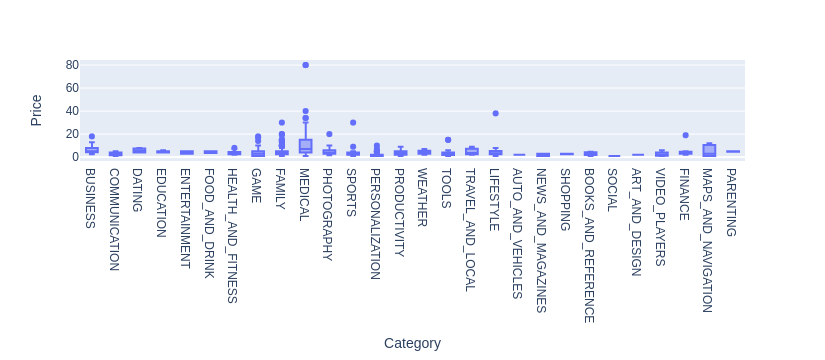

In [15]:
px.box(data_frame=paidAppsDf[paidAppsDf['Price']<99],x='Category',y='Price')

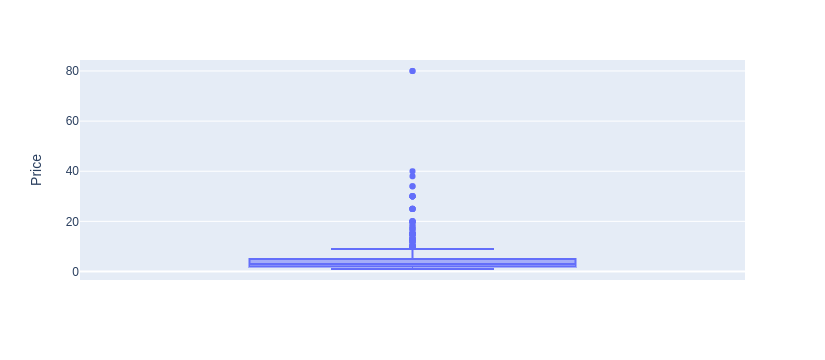

In [16]:
px.box(data_frame=paidAppsDf[paidAppsDf['Price']<99],y='Price')

* Legit Medical Apps tend to be more expensive than any other category 
* Suitable price range for any legit paid app is ~ 1.99 to 4.99 with ~3 dollars being a sweet spot

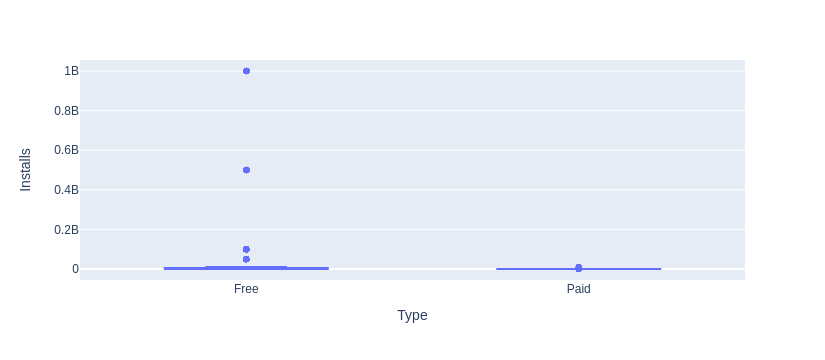

In [17]:
px.box(data_frame=dataset,x='Type',y='Installs')

* There are some crazily popular free apps

In [18]:
dataset[dataset['Installs']>500000000]

App             Category  Rating  \
144                          Google Play Books  BOOKS_AND_REFERENCE     3.9   
322   Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
323                         WhatsApp Messenger        COMMUNICATION     4.4   
325               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
327                                      Gmail        COMMUNICATION     4.3   
328                                   Hangouts        COMMUNICATION     4.0   
368                         WhatsApp Messenger        COMMUNICATION     4.4   
369   Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
373                                   Hangouts        COMMUNICATION     4.0   
378              Skype - free IM & video calls        COMMUNICATION     4.1   
398               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
438                                      Gmail        COMMUNICATION     4.3   
451                                   Hangouts        COMMUNICATION     4.0   
455              Skype - free IM & video calls        COMMUNICATION     4.1   
812                          Google Play Games        ENTERTAINMENT     4.3   
1570                            Subway Surfers                 GAME     4.5   
1616                            Subway Surfers                 GAME     4.5   
1666                            Subway Surfers                 GAME     4.5   
1788                            Subway Surfers                 GAME     4.5   
1833                            Subway Surfers                 GAME     4.5   
2403                                  Facebook               SOCIAL     4.1   
2404                                 Instagram               SOCIAL     4.5   
2413                                   Google+               SOCIAL     4.2   
2463                                 Instagram               SOCIAL     4.5   
2470                                 Instagram               SOCIAL     4.5   
2667                             Google Photos          PHOTOGRAPHY     4.5   
2712                             Google Photos          PHOTOGRAPHY     4.5   
2743                             Google Photos          PHOTOGRAPHY     4.5   
2976                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
2986                        Google Street View     TRAVEL_AND_LOCAL     4.2   
3082                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
3091                        Google Street View     TRAVEL_AND_LOCAL     4.2   
3093                                    Google                TOOLS     4.4   
3311                              Google Drive         PRODUCTIVITY     4.4   
3380                              Google Drive         PRODUCTIVITY     4.4   
3422                              Google Drive         PRODUCTIVITY     4.4   
3512                                   YouTube        VIDEO_PLAYERS     4.3   
3534                   Google Play Movies & TV        VIDEO_PLAYERS     3.7   
3582                               Google News   NEWS_AND_MAGAZINES     3.9   
3611                               Google News   NEWS_AND_MAGAZINES     3.9   
3662                               Google News   NEWS_AND_MAGAZINES     3.9   
3742                            Subway Surfers                 GAME     4.5   
3750                        WhatsApp Messenger        COMMUNICATION     4.4   
3755                                 Instagram               SOCIAL     4.5   
3774                                   YouTube        VIDEO_PLAYERS     4.3   
3789                                  Facebook               SOCIAL     4.1   
3840              Google Chrome: Fast & Secure        COMMUNICATION     4.3   
3940                                     Gmail        COMMUNICATION     4.3   
3942                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
3948  Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
3984          

* All of the highly top tier downloaded apps are Free Apps by Large companies like Google, Facebook & games like Subway Surfers